# Information
$Writer:{\;}Junhyuck{\;}Woo
\\ Std. ID: 20145337
\\Project:{\;}K-means{\;}algorithm{\;}on{\;}color{\;}image$

# import library

In [1]:
from collections import Counter
from collections import OrderedDict
import matplotlib.pyplot as plt
import numpy as np
import random as rd
from PIL import Image

# Load file

In [2]:
image = Image.open('Lenna.png').convert('RGB')
np_image = np.array(image)

# Global parameter

In [3]:
size_row = np_image.shape[0]        # height of the image
size_col = np_image.shape[1]         # width of the image
size_data = size_row*size_col

pre_list_label  = np.empty(size_data, dtype=int)
cluster_label = np.empty(size_data, dtype=int)

# Function: normalize the values of the input data to be [0, 1]

In [4]:
def normalize(data):

    data_normalized = (data - np.min(data)) / (np.max(data) - np.min(data))

    return(data_normalized)

# Function: Distance between two vectors x and y

In [5]:
def distance(x, y):

    d = (x - y) * (x - y)
    s = np.sum(d)
    r = np.sqrt(s)

    return(s)

# Function: Centroid Combination

In [6]:
def centroid_combination(centroid, centroid_label):
    result = np.zeros((size_row, size_col, 3), dtype=float)
    for i in range(size_row):
        for j in range(size_col):
            result[i,j,:] = centroid[:, centroid_label[i,j]]
            
    return(normalize(result))

# Function: Visualizer

In [7]:
def visualizer(data, data_label):
    f1 = plt.figure(1)

    plt.title(data_label)
    plt.imshow(data, interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
        
    plt.show()

# Function: Initialize Centroid Label

In [8]:
def initialize_centroid_label(k, num_data):
    centroid_label = np.empty(num_data, dtype=int)
    
    # clustering
    for i in range(num_data):
        label = rd.randint(1, k) - 1
        centroid_label[i] = label
    
    return(centroid_label.reshape((size_row, size_col)))

# Function: Calculate Centroid

In [9]:
def calculate_average_centroid(k, train_data, centroid_label, num_train):
    
    centroid = np.zeros((3, k), dtype=float)
    count = np.zeros(k,dtype=int)
    
    # Create centroid image
    for i in range(size_row):
        for j in range(size_col):
            index = centroid_label[i,j]
            centroid[:,index] += train_data[i,j,:]
            count[index] += 1
    
    for i in range(k):
        if (count[i] != 0):
            centroid[:, i] /= count[i]

    return(centroid)

# Function: Clustering Data

In [10]:
def clustering(num, train_image, centroid, num_train):
    cluster_label = np.empty((size_row, size_col),dtype=int)
    dist = np.empty(num, dtype=float)
    
    for i in range(size_row):
        for j in range(size_col):
            for k in range(num):
                dist[k] = distance(train_image[i,j,:], centroid[:,k])
            cluster_label[i,j] = np.argmin(dist)

    return(cluster_label)

# Function: Energy
$\frac{1}{n} \sum_{x \in \Omega} \| f(x) - m_c \|^2
\\ where{\;}{k_i}{\;}denotes{\;}the{\;}category{\;}of{\;}{x_i},{\;}and{\;}c_{k_i}{\;}denotes{\;}the{\;}centroid{\;}of{\;}category{\;}{x_i}$

In [11]:
def calculate_energy(train_data, num_train, centroid, centroid_label):
    energy = 0
    
    for i in range(size_row):
        for j in range(size_col):
            energy += distance(train_data[i,j,:], centroid[:,centroid_label[i,j]])

    return(energy/(size_row*size_col))

# Function: K Means Algorithms

In [12]:
def k_means(k, train_data, num_train):
    iteration = 0
    energy = []
    train_accuracy = []
    test_accuracy = []
    real_label = np.empty(k, dtype=int)
    
    previous_label = np.zeros((size_row, size_col), dtype=int)
    centroid_label = initialize_centroid_label(k, num_train)
    
    while (~np.all(previous_label == centroid_label)):
        iteration+=1
        
        centroid = calculate_average_centroid(k, train_data, centroid_label, num_train)
        
        # check traaining energy
        energy.append(calculate_energy(train_data, num_train, centroid, centroid_label))

        previous_label = centroid_label
        centroid_label = clustering(k, train_data, centroid, num_train)
    
        
    # Visualize K centroid images for each category.
    visualizer(np_image,'Origin')
    visualizer(centroid_combination(centroid, centroid_label), 'Segmentation')
        
    # Plot the training energy per optimization iteration.
    plt.plot(energy, label='Training Energy')
    plt.legend(loc='lower right')
    plt.show()

# K = 2

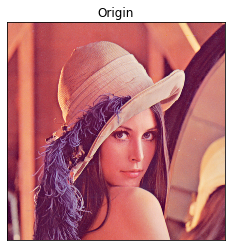

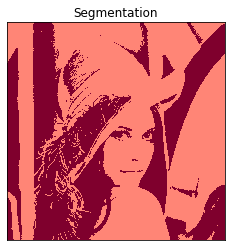

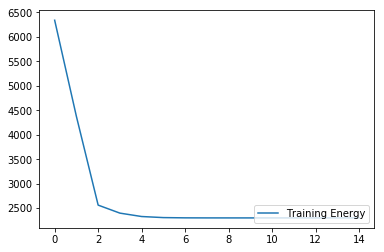

In [13]:
k=2
k_means(k, np_image, size_data)

# K = 4

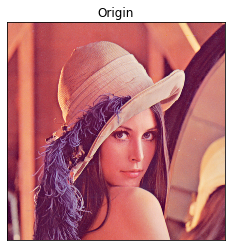

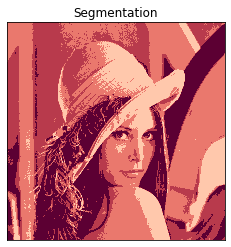

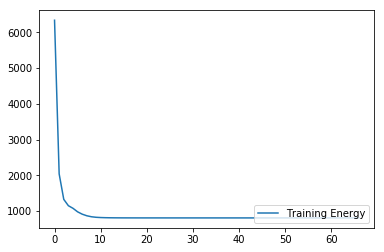

In [14]:
k=4
k_means(k, np_image, size_data)

# K = 8

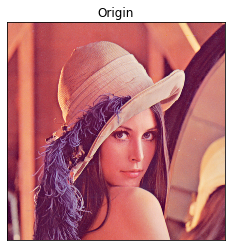

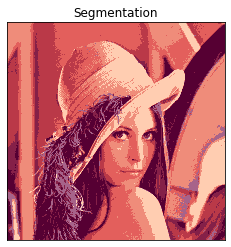

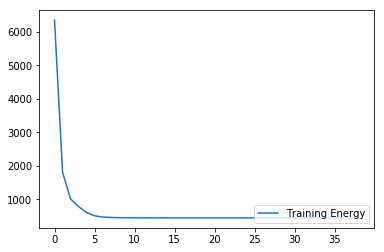

In [15]:
k=8
k_means(k, np_image, size_data)

# K = 16

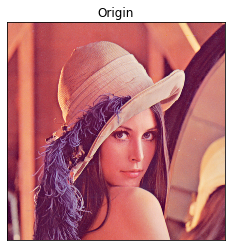

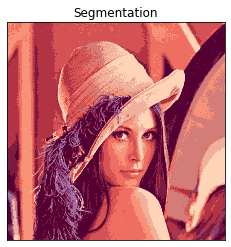

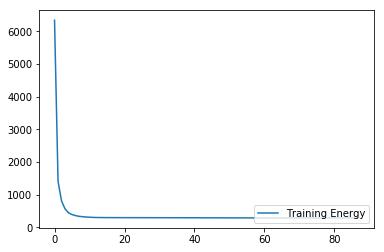

In [16]:
k=16
k_means(k, np_image, size_data)